In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from scipy.integrate import odeint
import scipy
import pandas as pd

In [13]:
#algorithm for splitting the dataset into training and validation 
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [14]:
O_m=np.arange(0.1,0.51,0.01)
H_0=np.arange(66,81,1)
t=np.linspace(0,-12,50)

In [15]:
def RHS(Omega_i, lna, gamma=0):
    x, y, z, H = Omega_i
    #x, y, z = Omega_i
    pi = 3*x + 4*y
    return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    #return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(t,Om,H0):
    #t,Or,Om,Ol=X
    Or=0.0001
    Ol=1-Or-Om
    #H0 = 70.
    y0 = [Om, Or, Ol, H0]
    result = odeint(RHS, y0, t)
    return result

In [16]:
#lets generate the cartesian product between the intervals
Y0=[]
#este ciclo llena la lista fijando un Om y pasando todos los Or
for i in O_m:
    for j in H_0:
        Y0.extend(EDO(t,i,j))
Y0=np.array(Y0)

X0=[]
for Om in O_m:
    for H0 in H_0:
        for T in t:
            X0.append([T,Om,H0])
X0=np.array(X0)

In [17]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Y2 = scaler.fit_transform(Y0)

In [18]:
#Now, here are the datasets
print('feactures= \n',X0)
print('\n')
print('labels= \n',Y2)

feactures= 
 [[  0.           0.1         66.        ]
 [ -0.24489796   0.1         66.        ]
 [ -0.48979592   0.1         66.        ]
 ...
 [-11.51020408   0.5         80.        ]
 [-11.75510204   0.5         80.        ]
 [-12.           0.5         80.        ]]


labels= 
 [[9.47515373e-02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.83608702e-01 1.41110961e-04 9.01997379e-01 1.62358493e-10]
 [3.22333902e-01 4.33937896e-04 7.48914062e-01 4.77144941e-10]
 ...
 [4.20164900e-02 9.58104047e-01 5.58399792e-11 3.78984027e-01]
 [3.19464665e-02 9.68145182e-01 5.73926563e-11 6.15280156e-01]
 [2.39153274e-02 9.76153281e-01 5.75109456e-11 1.00000000e+00]]


/home/isidro/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0349 - val_loss: 0.0135
Epoch 2/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0117 - val_loss: 0.0134
Epoch 3/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0089 - val_loss: 0.0057
Epoch 4/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 5/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 6/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 7/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 8/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 9/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0169
Epoch 10/500
769/769 [==============================] - 1s 1ms/step - loss: 0.0039 - val_lo

769/769 [==============================] - 1s 1ms/step - loss: 7.4742e-04 - val_loss: 2.2106e-04
Epoch 79/500
769/769 [==============================] - 1s 1ms/step - loss: 7.3060e-04 - val_loss: 1.4247e-04
Epoch 80/500
769/769 [==============================] - 1s 1ms/step - loss: 7.2294e-04 - val_loss: 4.9929e-04
Epoch 81/500
769/769 [==============================] - 1s 1ms/step - loss: 7.4603e-04 - val_loss: 0.0037
Epoch 82/500
769/769 [==============================] - 1s 1ms/step - loss: 7.2296e-04 - val_loss: 0.0015
Epoch 83/500
769/769 [==============================] - 1s 1ms/step - loss: 7.1121e-04 - val_loss: 3.0445e-04
Epoch 84/500
769/769 [==============================] - 1s 1ms/step - loss: 6.9669e-04 - val_loss: 0.0017
Epoch 85/500
769/769 [==============================] - 1s 1ms/step - loss: 7.1398e-04 - val_loss: 4.4517e-04
Epoch 86/500
769/769 [==============================] - 1s 1ms/step - loss: 6.8291e-04 - val_loss: 0.0033
Epoch 87/500
769/769 [=================

769/769 [==============================] - 1s 1ms/step - loss: 5.1729e-04 - val_loss: 1.3082e-04
Epoch 153/500
769/769 [==============================] - 1s 1ms/step - loss: 4.7087e-04 - val_loss: 4.2205e-05
Epoch 154/500
769/769 [==============================] - 1s 1ms/step - loss: 5.1011e-04 - val_loss: 3.9445e-04
Epoch 155/500
769/769 [==============================] - 1s 1ms/step - loss: 4.8854e-04 - val_loss: 0.0025
Epoch 156/500
769/769 [==============================] - 1s 1ms/step - loss: 4.9476e-04 - val_loss: 1.7458e-04
Epoch 157/500
769/769 [==============================] - 1s 1ms/step - loss: 5.3122e-04 - val_loss: 2.8107e-04
Epoch 158/500
769/769 [==============================] - 1s 1ms/step - loss: 4.8642e-04 - val_loss: 1.0125e-04
Epoch 159/500
769/769 [==============================] - 1s 1ms/step - loss: 5.0385e-04 - val_loss: 4.5848e-04
Epoch 160/500
769/769 [==============================] - 1s 1ms/step - loss: 5.0559e-04 - val_loss: 5.9024e-05
Epoch 161/500
769/7

769/769 [==============================] - 1s 1ms/step - loss: 4.0879e-04 - val_loss: 5.4435e-05
Epoch 227/500
769/769 [==============================] - 1s 1ms/step - loss: 4.2899e-04 - val_loss: 6.4619e-04
Epoch 228/500
769/769 [==============================] - 1s 1ms/step - loss: 3.7589e-04 - val_loss: 4.4218e-04
Epoch 229/500
769/769 [==============================] - 1s 1ms/step - loss: 4.1135e-04 - val_loss: 8.3739e-05
Epoch 230/500
769/769 [==============================] - 1s 1ms/step - loss: 4.1556e-04 - val_loss: 3.4663e-04
Epoch 231/500
769/769 [==============================] - 1s 1ms/step - loss: 4.2082e-04 - val_loss: 3.2087e-05
Epoch 232/500
769/769 [==============================] - 1s 1ms/step - loss: 3.9285e-04 - val_loss: 3.1808e-05
Epoch 233/500
769/769 [==============================] - 1s 1ms/step - loss: 3.9050e-04 - val_loss: 8.5758e-04
Epoch 234/500
769/769 [==============================] - 1s 1ms/step - loss: 4.0201e-04 - val_loss: 9.0205e-05
Epoch 235/500
7

769/769 [==============================] - 1s 1ms/step - loss: 3.8460e-04 - val_loss: 1.5159e-04
Epoch 301/500
769/769 [==============================] - 1s 1ms/step - loss: 3.4987e-04 - val_loss: 2.2167e-05
Epoch 302/500
769/769 [==============================] - 1s 1ms/step - loss: 3.5842e-04 - val_loss: 3.5220e-05
Epoch 303/500
769/769 [==============================] - 1s 1ms/step - loss: 3.3863e-04 - val_loss: 4.7896e-05
Epoch 304/500
769/769 [==============================] - 1s 1ms/step - loss: 3.8096e-04 - val_loss: 0.0036
Epoch 305/500
769/769 [==============================] - 1s 1ms/step - loss: 3.2248e-04 - val_loss: 2.0754e-05
Epoch 306/500
769/769 [==============================] - 1s 1ms/step - loss: 3.2856e-04 - val_loss: 1.9111e-05
Epoch 307/500
769/769 [==============================] - 1s 1ms/step - loss: 3.3886e-04 - val_loss: 2.6017e-05
Epoch 308/500
769/769 [==============================] - 1s 1ms/step - loss: 3.4800e-04 - val_loss: 0.0038
Epoch 309/500
769/769 [

769/769 [==============================] - 1s 1ms/step - loss: 3.3681e-04 - val_loss: 1.4584e-05
Epoch 375/500
769/769 [==============================] - 1s 1ms/step - loss: 3.5182e-04 - val_loss: 1.3582e-04
Epoch 376/500
769/769 [==============================] - 1s 1ms/step - loss: 3.5156e-04 - val_loss: 4.9807e-05
Epoch 377/500
769/769 [==============================] - 1s 1ms/step - loss: 3.4844e-04 - val_loss: 1.4252e-04
Epoch 378/500
769/769 [==============================] - 1s 1ms/step - loss: 3.2461e-04 - val_loss: 8.2640e-04
Epoch 379/500
769/769 [==============================] - 1s 1ms/step - loss: 3.2448e-04 - val_loss: 4.7213e-04
Epoch 380/500
769/769 [==============================] - 1s 1ms/step - loss: 3.0026e-04 - val_loss: 9.2400e-05
Epoch 381/500
769/769 [==============================] - 1s 1ms/step - loss: 3.1474e-04 - val_loss: 1.7545e-05
Epoch 382/500
769/769 [==============================] - 1s 1ms/step - loss: 3.2229e-04 - val_loss: 1.7729e-05
Epoch 383/500
7

769/769 [==============================] - 1s 1ms/step - loss: 2.7625e-04 - val_loss: 2.0311e-05
Epoch 449/500
769/769 [==============================] - 1s 1ms/step - loss: 2.9026e-04 - val_loss: 4.9983e-05
Epoch 450/500
769/769 [==============================] - 1s 1ms/step - loss: 2.7970e-04 - val_loss: 6.0544e-04
Epoch 451/500
769/769 [==============================] - 1s 1ms/step - loss: 2.4400e-04 - val_loss: 3.1487e-05
Epoch 452/500
769/769 [==============================] - 1s 1ms/step - loss: 2.8167e-04 - val_loss: 1.0289e-05
Epoch 453/500
769/769 [==============================] - 1s 1ms/step - loss: 2.4889e-04 - val_loss: 3.6993e-05
Epoch 454/500
769/769 [==============================] - 1s 1ms/step - loss: 2.9250e-04 - val_loss: 5.4795e-05
Epoch 455/500
769/769 [==============================] - 1s 1ms/step - loss: 3.3245e-04 - val_loss: 3.4427e-05
Epoch 456/500
769/769 [==============================] - 1s 1ms/step - loss: 2.9411e-04 - val_loss: 4.1409e-05
Epoch 457/500
7

Text(0.5, 1.0, 'Error durante el entrenamiento')

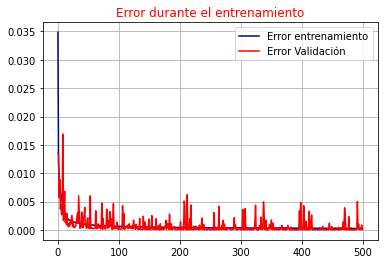

In [19]:
#Dos paredes ocultas
nodos=150
split_size=0.8
learning_rate=0.001
epocas=500

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X0,Y2,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(3,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa3=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa4=layers.Dense(nodos,use_bias=1,activation='sigmoid')
#para la capa de salida usamos Id como activación
salida=layers.Dense(4,use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(capa2)
model.add(capa3)
model.add(capa4)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas)


Text(0.5, 1.0, 'Error durante el entrenamiento')

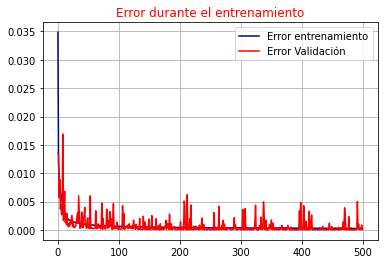

In [22]:
error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

Text(-8.5, 0.1, '$\\Omega_{\\Lambda}$')

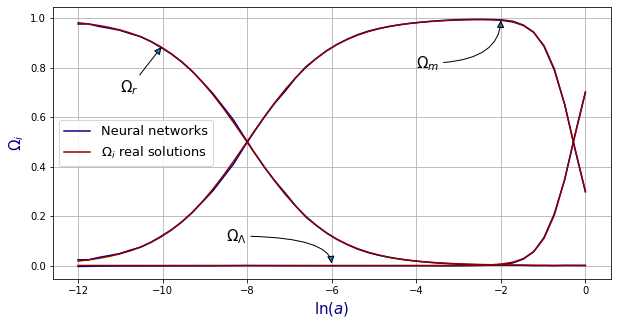

In [20]:
Z=np.linspace(0,-12,50)
dom=[]
dom2=[]
dom3=[]
#different combinations for the params

for z in Z: dom.append([z,0.5,80]) 
A=model.predict(dom)               
# ¡¡¡ The inverse transformation must be applied in order to return the labels to their original ranges!!!
A=scaler.inverse_transform(A) 

for z in Z: dom2.append([z,0.3,70]) 
B=model.predict(dom2)
B=scaler.inverse_transform(B)

for z in Z: dom3.append([z,0.4,67]) 
C=model.predict(dom3)
C=scaler.inverse_transform(C)
#función real
D=EDO(Z, 0.3,70)



#Realvs model
plt.figure(figsize=(10,5))
plt.plot(Z,B[:,0],color='darkblue')
plt.plot(Z,B[:,1],color='darkblue')
plt.plot(Z,B[:,2],color='darkblue', label='Neural networks')
#plt.plot(Z,B[:,3])


plt.plot(Z,D[:,0],color='darkred')
plt.plot(Z,D[:,1],color='darkred')
plt.plot(Z,D[:,2],color='darkred', label='$\Omega_i$ real solutions')
#plt.plot(Z,D[:,3])

#plt.title()
plt.xlabel('$\ln(a)$', size=15, color='darkblue')
plt.ylabel('$\Omega_i$', size=15, color='darkblue')
plt.grid()
plt.legend(fontsize=13)

plt.annotate('$\Omega_m$', xy=(-2,1), xytext=(-4,0.8), size=15,
           arrowprops=dict(arrowstyle='-|>', connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate('$\Omega_r$', xy=(-10,0.89), xytext=(-11,0.7),size=15,
           arrowprops=dict(arrowstyle='-|>'))

plt.annotate('$\Omega_{\Lambda}$', xy=(-6,0), xytext=(-8.5,0.1),size=15,
           arrowprops=dict(arrowstyle='-|>', connectionstyle="angle3,angleA=0,angleB=90"))

#plt.savefig('red_vs_sol.pdf')


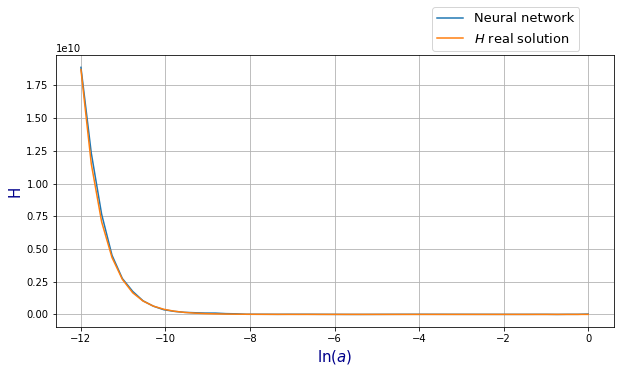

In [21]:
#H realvs model
plt.figure(figsize=(10,5))
plt.plot(Z,B[:,3], label='Neural network')
plt.plot(Z,D[:,3], label='$H$ real solution')

plt.xlabel('$\ln(a)$', size=15, color='darkblue')
plt.ylabel('H', size=15, color='darkblue')
plt.grid()
#plt.legend(fontsize=13)
plt.legend(bbox_to_anchor =(0.95,1.2),fontsize=13)
#plt.savefig('H_sol_vs_net.pdf')